In [303]:
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
from matplotlib import pyplot as plt

# Preprocessing

In [336]:
#read excel
df1 = pd.read_excel('/Users/yuyaozhuge/Documents/WASHU_study/576_Analytics_Applications/MW1.xlsx',sheet_name='Sheet2')
#concatenate sheets to one dataframe
for i in range(1,29):
    df = pd.read_excel('/Users/yuyaozhuge/Documents/WASHU_study/576_Analytics_Applications/MW1.xlsx',sheet_name=i)
    df = pd.concat([df1,df],ignore_index=True,sort=False)
    df1 = df
df1

,FrameCount,TeamType,JerseyNumber,XPosition,YPosition,PlayerSpeed
0,2122262,-1,-1,194,-954,0.0
1,2122263,-1,-1,186,-954,0.0
2,2122264,-1,-1,177,-953,0.0
3,2122265,-1,-1,167,-952,0.0
4,2122266,-1,-1,158,-952,0.0
...,...,...,...,...,...,...
6030284,2330198,-1,-1,-588,-3283,0.0
6030285,2330199,-1,-1,-588,-3280,0.0
6030286,2330200,-1,-1,-589,-3275,0.0
6030287,2330201,-1,-1,-590,-3271,0.0


In [272]:
#list the numbers of data for each player
df['JerseyNumber'].value_counts()

-1     1570541
 1      528959
 10     355700
 2      354944
 6      329814
 9      324869
 14     322835
 7      293644
 15     193558
 8      186482
 0      183108
 22     180200
 26     180139
 24     177950
 4      162335
 33     143401
 23     131799
 21     115033
 11      64922
 28      64190
 17      47756
 13      36389
 12      26156
 19      24777
 37      15994
 18      14794
Name: JerseyNumber, dtype: int64

In [273]:
#classify and group by team
df_team = df.groupby('TeamType')
#list each different team
for name, team in df_team:
    print(f"Team {name}:")
    print(team)

Team -1:
         FrameCount  TeamType  JerseyNumber  XPosition  YPosition  PlayerSpeed
0           2122262        -1            -1        194       -954          0.0
1           2122263        -1            -1        186       -954          0.0
2           2122264        -1            -1        177       -953          0.0
3           2122265        -1            -1        167       -952          0.0
4           2122266        -1            -1        158       -952          0.0
...             ...       ...           ...        ...        ...          ...
6030284     2330198        -1            -1       -588      -3283          0.0
6030285     2330199        -1            -1       -588      -3280          0.0
6030286     2330200        -1            -1       -589      -3275          0.0
6030287     2330201        -1            -1       -590      -3271          0.0
6030288     2330202        -1            -1       -591      -3267          0.0

[709967 rows x 6 columns]
Team 0:
        

In [274]:
#fetch target team 0 and 1 from groupby object to dataframe object 
team_0 = df_team.get_group(0)
team_1 = df_team.get_group(1)
team_0.head(2)

,FrameCount,TeamType,JerseyNumber,XPosition,YPosition,PlayerSpeed
1321,2123583,0,10,-383,-2822,0.0
1322,2123584,0,10,-383,-2820,0.0


# Q1 for Team 0

In [275]:
#calculate each framecount in minutes
team_0['Minutes_Played'] = 1/30/60
team_0

/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/1659890046.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_0['Minutes_Played'] = 1/30/60


,FrameCount,TeamType,JerseyNumber,XPosition,YPosition,PlayerSpeed,Minutes_Played
1321,2123583,0,10,-383,-2822,0.00,0.000556
1322,2123584,0,10,-383,-2820,0.00,0.000556
1323,2123585,0,10,-382,-2820,0.00,0.000556
1324,2123586,0,10,-381,-2819,0.00,0.000556
1325,2123587,0,10,-381,-2817,0.00,0.000556
...,...,...,...,...,...,...,...
6015302,2315216,0,10,-402,-3634,0.73,0.000556
6015303,2315217,0,10,-402,-3636,0.73,0.000556
6015304,2315218,0,10,-402,-3638,0.76,0.000556
6015305,2315219,0,10,-403,-3640,0.73,0.000556


In [276]:
#Assume the instant speed is constant. Calculate the distance in each frame.
team_0['Total_Distance'] = team_0['PlayerSpeed']/30

#As a reference, according to the article 
#https://www.frontiersin.org/articles/10.3389/fspor.2023.1116293/full#:~:text=During%20official%20matches%2C%20high%2Dspeed,in%20professional%20male%20soccer%20players.
#high-speed distance ranges from 19.8km/h ~ 25.1km/h which is 5.5m/s ~ 7.0m/s
#and sprint distance ranges over 25.1km/h which is greater than 7.0m/s.

#Use distance = speed * time. Find PlayerSpeed within the range of 5.5 and 7, then divide it by 30 to get distance
#per FrameCount
team_0['High_Speed_Distance'] = team_0.loc[(team_0['PlayerSpeed']>5.5) & (team_0['PlayerSpeed']<7),'PlayerSpeed']/30
#Fill the None value in 'High_Speed_Distance' with 0.
team_0['High_Speed_Distance'].fillna(0,inplace=True)
team_0

/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/435148232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_0['Total_Distance'] = team_0['PlayerSpeed']/30
/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/435148232.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_0['High_Speed_Distance'] = team_0.loc[(team_0['PlayerSpeed']>5.5) & (team_0['PlayerSpeed']<7),'PlayerSpeed']/30
/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/435148232.py:9: SettingW

,FrameCount,TeamType,JerseyNumber,XPosition,YPosition,PlayerSpeed,Minutes_Played,Total_Distance,High_Speed_Distance
1321,2123583,0,10,-383,-2822,0.00,0.000556,0.000000,0.0
1322,2123584,0,10,-383,-2820,0.00,0.000556,0.000000,0.0
1323,2123585,0,10,-382,-2820,0.00,0.000556,0.000000,0.0
1324,2123586,0,10,-381,-2819,0.00,0.000556,0.000000,0.0
1325,2123587,0,10,-381,-2817,0.00,0.000556,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
6015302,2315216,0,10,-402,-3634,0.73,0.000556,0.024333,0.0
6015303,2315217,0,10,-402,-3636,0.73,0.000556,0.024333,0.0
6015304,2315218,0,10,-402,-3638,0.76,0.000556,0.025333,0.0
6015305,2315219,0,10,-403,-3640,0.73,0.000556,0.024333,0.0


In [277]:
#Use distance = speed * time. Find PlayerSpeed greater than 7, then divide it by 30 to get distance
#per FrameCount
team_0['Sprint_Distance'] = team_0.loc[team_0['PlayerSpeed']>=7,'PlayerSpeed']/30
#Fill the None value in 'Sprint_Distance' with 0.
team_0['Sprint_Distance'].fillna(0,inplace=True)
team_0

/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/1126208082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_0['Sprint_Distance'] = team_0.loc[team_0['PlayerSpeed']>=7,'PlayerSpeed']/30
/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/1126208082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_0['Sprint_Distance'].fillna(0,inplace=True)


,FrameCount,TeamType,JerseyNumber,XPosition,YPosition,PlayerSpeed,Minutes_Played,Total_Distance,High_Speed_Distance,Sprint_Distance
1321,2123583,0,10,-383,-2822,0.00,0.000556,0.000000,0.0,0.0
1322,2123584,0,10,-383,-2820,0.00,0.000556,0.000000,0.0,0.0
1323,2123585,0,10,-382,-2820,0.00,0.000556,0.000000,0.0,0.0
1324,2123586,0,10,-381,-2819,0.00,0.000556,0.000000,0.0,0.0
1325,2123587,0,10,-381,-2817,0.00,0.000556,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6015302,2315216,0,10,-402,-3634,0.73,0.000556,0.024333,0.0,0.0
6015303,2315217,0,10,-402,-3636,0.73,0.000556,0.024333,0.0,0.0
6015304,2315218,0,10,-402,-3638,0.76,0.000556,0.025333,0.0,0.0
6015305,2315219,0,10,-403,-3640,0.73,0.000556,0.024333,0.0,0.0


In [278]:
#Sprint_Appearance finds how many non-zero value of Sprint_Distance are in the dataset
team_0['Sprint_Appearance'] = 0
team_0['Sprint_Appearance'] = team_0.loc[team_0['Sprint_Distance']!=0,'Sprint_Appearance']+1
team_0['Sprint_Appearance'].fillna(0,inplace=True)
team_0

/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/890755507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_0['Sprint_Appearance'] = 0
/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/890755507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_0['Sprint_Appearance'] = team_0.loc[team_0['Sprint_Distance']!=0,'Sprint_Appearance']+1
/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/890755507.py:3: SettingWithCopyWarning: 
A value is trying to be set

,FrameCount,TeamType,JerseyNumber,XPosition,YPosition,PlayerSpeed,Minutes_Played,Total_Distance,High_Speed_Distance,Sprint_Distance,Sprint_Appearance
1321,2123583,0,10,-383,-2822,0.00,0.000556,0.000000,0.0,0.0,0.0
1322,2123584,0,10,-383,-2820,0.00,0.000556,0.000000,0.0,0.0,0.0
1323,2123585,0,10,-382,-2820,0.00,0.000556,0.000000,0.0,0.0,0.0
1324,2123586,0,10,-381,-2819,0.00,0.000556,0.000000,0.0,0.0,0.0
1325,2123587,0,10,-381,-2817,0.00,0.000556,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6015302,2315216,0,10,-402,-3634,0.73,0.000556,0.024333,0.0,0.0,0.0
6015303,2315217,0,10,-402,-3636,0.73,0.000556,0.024333,0.0,0.0,0.0
6015304,2315218,0,10,-402,-3638,0.76,0.000556,0.025333,0.0,0.0,0.0
6015305,2315219,0,10,-403,-3640,0.73,0.000556,0.024333,0.0,0.0,0.0


In [279]:
team_0[team_0['PlayerSpeed'] >= 7]

,FrameCount,TeamType,JerseyNumber,XPosition,YPosition,PlayerSpeed,Minutes_Played,Total_Distance,High_Speed_Distance,Sprint_Distance,Sprint_Appearance
1763,2124025,0,10,-1564,438,7.02,0.000556,0.234000,0.0,0.234000,1.0
1764,2124026,0,10,-1580,456,7.06,0.000556,0.235333,0.0,0.235333,1.0
1765,2124027,0,10,-1596,473,7.06,0.000556,0.235333,0.0,0.235333,1.0
1766,2124028,0,10,-1611,491,7.06,0.000556,0.235333,0.0,0.235333,1.0
1767,2124029,0,10,-1627,510,7.06,0.000556,0.235333,0.0,0.235333,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5809500,2317355,0,11,3351,-1010,7.11,0.000556,0.237000,0.0,0.237000,1.0
5809501,2317356,0,11,3366,-1028,7.11,0.000556,0.237000,0.0,0.237000,1.0
5809502,2317357,0,11,3381,-1044,7.08,0.000556,0.236000,0.0,0.236000,1.0
5809503,2317358,0,11,3397,-1058,7.03,0.000556,0.234333,0.0,0.234333,1.0


In [280]:
#The logic to find Sprint_Count is to divide FrameCount into groups with consecutive numbers. For each group,
#if there appears PlayerSpeed grater than 7, Sprint_Count += 1. 

# initializing list
tuple_list = []
#Set groups to divide FrameCount. If FrameCount.diff is greater than 1, set to another group.
team_0['Sprint_Count_Group'] = (team_0['FrameCount'].diff()>1).cumsum()
sprint_count_group = team_0.groupby(['Sprint_Count_Group','JerseyNumber'])
for name, group in sprint_count_group:
    #Search if any PlayerSpeed is greater than 7
    if (group['PlayerSpeed'] >=7).any():
        tuple_list.append(name)

result = defaultdict(list)
for sub in tuple_list:
    # getting all keys to values

    result[sub[1]].append(sub[0])
#put result into dict object
result = dict(result)
res_dict = dict()
for key in result:
    # getting unique key counts for each value
    res_dict[key] = len(list(set(result[key])))
res_dict

/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/1349172824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_0['Sprint_Count_Group'] = (team_0['FrameCount'].diff()>1).cumsum()


{8: 8,
 10: 8,
 2: 8,
 22: 10,
 6: 6,
 9: 11,
 11: 7,
 12: 2,
 14: 10,
 21: 6,
 26: 8,
 7: 4,
 28: 2,
 19: 2,
 15: 1}

In [281]:
res_df = pd.DataFrame(list(res_dict.items()),columns=['JerseyNumber','Sprint_Count'])
res_df

,JerseyNumber,Sprint_Count
0,8,8
1,10,8
2,2,8
3,22,10
4,6,6
5,9,11
6,11,7
7,12,2
8,14,10
9,21,6


In [282]:
#Select columns from team_0
team0_result = team_0.groupby('JerseyNumber')[['Minutes_Played','Total_Distance','High_Speed_Distance','Sprint_Distance','Sprint_Appearance']].sum()
#Reset Indices to merge
team0_new = team0_result.reset_index()
#Merge two df
team0_final = team0_new.merge(res_df,how='left')
#fill Sprint_count = None with 0
team0_final = team0_final.fillna(0)
team0_final

,JerseyNumber,Minutes_Played,Total_Distance,High_Speed_Distance,Sprint_Distance,Sprint_Appearance,Sprint_Count
0,1,100.165000,6240.750000,78.724667,0.000000,0.0,0.0
1,2,99.045556,11688.446667,702.792000,219.651333,861.0,8.0
2,6,83.178333,10105.965000,522.319333,21.488667,88.0,6.0
3,7,64.174444,8267.044667,638.086333,100.775667,394.0,4.0
4,8,83.215556,9988.368000,883.843000,172.417667,674.0,8.0
5,9,91.059444,9424.042667,555.591000,197.345667,780.0,11.0
6,10,99.078333,11913.768000,857.956000,106.218667,418.0,8.0
7,11,36.067778,4497.446667,321.653000,160.052333,618.0,7.0
8,12,14.531111,1930.603000,237.603333,82.077333,333.0,2.0
9,14,101.300000,11184.940333,585.826667,355.854000,1402.0,10.0


# Q1 for Team 1

In [283]:
#calculate each framecount in minutes
team_1['Minutes_Played'] = 1/30/60
team_1

/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/3887307361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_1['Minutes_Played'] = 1/30/60


,FrameCount,TeamType,JerseyNumber,XPosition,YPosition,PlayerSpeed,Minutes_Played
47376,2169638,1,10,1764,-1066,2.82,0.000556
47377,2169639,1,10,1771,-1070,2.79,0.000556
47378,2169640,1,10,1779,-1074,2.75,0.000556
47379,2169641,1,10,1788,-1079,2.80,0.000556
47380,2169642,1,10,1796,-1084,2.78,0.000556
...,...,...,...,...,...,...,...
6000109,2300023,1,1,3100,480,1.49,0.000556
6000110,2300024,1,1,3095,478,1.47,0.000556
6000111,2300025,1,1,3091,474,1.47,0.000556
6000112,2300026,1,1,3086,471,1.47,0.000556


In [284]:
#Assume the instant speed is constant. Calculate the distance in each frame.
team_1['Total_Distance'] = team_1['PlayerSpeed']/30
#As a reference, according to the article 
#https://www.frontiersin.org/articles/10.3389/fspor.2023.1116293/full#:~:text=During%20official%20matches%2C%20high%2Dspeed,in%20professional%20male%20soccer%20players.
#high-speed distance ranges from 19.8km/h ~ 25.1km/h which is 5.5m/s ~ 7.0m/s
#and sprint distance ranges over 25.1km/h which is greater than 7.0m/s.

#Use distance = speed * time. Find PlayerSpeed within the range of 5.5 and 7, then divide it by 30 to get distance
#per FrameCount
team_1['High_Speed_Distance'] = team_1.loc[(team_1['PlayerSpeed']>5.5) & (team_1['PlayerSpeed']<7),'PlayerSpeed']/30
#Fill the None value in 'High_Speed_Distance' with 0.
team_1['High_Speed_Distance'].fillna(0,inplace=True)
team_1

/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/3900829916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_1['Total_Distance'] = team_1['PlayerSpeed']/30
/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/3900829916.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_1['High_Speed_Distance'] = team_1.loc[(team_1['PlayerSpeed']>5.5) & (team_1['PlayerSpeed']<7),'PlayerSpeed']/30
/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/3900829916.py:9: Setti

,FrameCount,TeamType,JerseyNumber,XPosition,YPosition,PlayerSpeed,Minutes_Played,Total_Distance,High_Speed_Distance
47376,2169638,1,10,1764,-1066,2.82,0.000556,0.094000,0.0
47377,2169639,1,10,1771,-1070,2.79,0.000556,0.093000,0.0
47378,2169640,1,10,1779,-1074,2.75,0.000556,0.091667,0.0
47379,2169641,1,10,1788,-1079,2.80,0.000556,0.093333,0.0
47380,2169642,1,10,1796,-1084,2.78,0.000556,0.092667,0.0
...,...,...,...,...,...,...,...,...,...
6000109,2300023,1,1,3100,480,1.49,0.000556,0.049667,0.0
6000110,2300024,1,1,3095,478,1.47,0.000556,0.049000,0.0
6000111,2300025,1,1,3091,474,1.47,0.000556,0.049000,0.0
6000112,2300026,1,1,3086,471,1.47,0.000556,0.049000,0.0


In [285]:
#Use distance = speed * time. Find PlayerSpeed greater than 7, then divide it by 30 to get distance
#per FrameCount
team_1['Sprint_Distance'] = team_1.loc[team_1['PlayerSpeed']>=7,'PlayerSpeed']/30
#Fill the None value in 'Sprint_Distance' with 0.
team_1['Sprint_Distance'].fillna(0,inplace=True)

/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/1309798024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_1['Sprint_Distance'] = team_1.loc[team_1['PlayerSpeed']>=7,'PlayerSpeed']/30
/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/1309798024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_1['Sprint_Distance'].fillna(0,inplace=True)


In [286]:
#Sprint_Appearance finds how many non-zero value of Sprint_Distance are in the dataset
team_1['Sprint_Appearance'] = 0
team_1['Sprint_Appearance'] = team_1.loc[team_1['Sprint_Distance']!=0,'Sprint_Appearance']+1
team_1['Sprint_Appearance'].fillna(0,inplace=True)
team_1

/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/148230462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_1['Sprint_Appearance'] = 0
/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/148230462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_1['Sprint_Appearance'] = team_1.loc[team_1['Sprint_Distance']!=0,'Sprint_Appearance']+1
/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/148230462.py:3: SettingWithCopyWarning: 
A value is trying to be set

,FrameCount,TeamType,JerseyNumber,XPosition,YPosition,PlayerSpeed,Minutes_Played,Total_Distance,High_Speed_Distance,Sprint_Distance,Sprint_Appearance
47376,2169638,1,10,1764,-1066,2.82,0.000556,0.094000,0.0,0.0,0.0
47377,2169639,1,10,1771,-1070,2.79,0.000556,0.093000,0.0,0.0,0.0
47378,2169640,1,10,1779,-1074,2.75,0.000556,0.091667,0.0,0.0,0.0
47379,2169641,1,10,1788,-1079,2.80,0.000556,0.093333,0.0,0.0,0.0
47380,2169642,1,10,1796,-1084,2.78,0.000556,0.092667,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6000109,2300023,1,1,3100,480,1.49,0.000556,0.049667,0.0,0.0,0.0
6000110,2300024,1,1,3095,478,1.47,0.000556,0.049000,0.0,0.0,0.0
6000111,2300025,1,1,3091,474,1.47,0.000556,0.049000,0.0,0.0,0.0
6000112,2300026,1,1,3086,471,1.47,0.000556,0.049000,0.0,0.0,0.0


In [287]:
#The logic to find Sprint_Count is to divide FrameCount into groups with consecutive numbers. For each group,
# initializing list
tuple_list = []
team_1['Sprint_Count_Group'] = (team_1['FrameCount'].diff()>1).cumsum()
sprint_count_group = team_1.groupby(['Sprint_Count_Group','JerseyNumber'])
for name, group in sprint_count_group:
    #if there appears PlayerSpeed grater than 7, Sprint_Count += 1. 
    if (group['PlayerSpeed'] >=7).any():
        tuple_list.append(name)

result = defaultdict(list)
for sub in tuple_list:
    # getting all keys to values

    result[sub[1]].append(sub[0])
    
#put result into a dict object
result = dict(result)
res_dict = dict()
for key in result:
    # getting unique key counts for each value
    res_dict[key] = len(list(set(result[key])))
res_dict

/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/3733135077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_1['Sprint_Count_Group'] = (team_1['FrameCount'].diff()>1).cumsum()


{10: 12,
 24: 6,
 9: 14,
 4: 7,
 7: 14,
 15: 8,
 33: 5,
 13: 3,
 23: 8,
 6: 10,
 14: 10,
 18: 1,
 17: 3,
 1: 2,
 8: 2}

In [288]:
#make dataframe res_df
res_df = pd.DataFrame(list(res_dict.items()),columns=['JerseyNumber','Sprint_Count'])
#Select columns from team_1
team1_result = team_1.groupby('JerseyNumber')[['Minutes_Played','Total_Distance','High_Speed_Distance','Sprint_Distance','Sprint_Appearance']].sum()
#Reset Indices to merge
team1_new = team1_result.reset_index()
#Merge two df
team1_final = team1_new.merge(res_df,how='left')
#fill Sprint_count = None with 0
team1_final = team1_final.fillna(0)
team1_final
# team1_result = team_1.groupby('JerseyNumber')[['Minutes_Played','Total_Distance','High_Speed_Distance','Sprint_Distance','Sprint_Appearance']].sum()
# team1_result


,JerseyNumber,Minutes_Played,Total_Distance,High_Speed_Distance,Sprint_Distance,Sprint_Appearance,Sprint_Count
0,1,100.405000,5688.225667,47.624667,13.417667,55.0,2.0
1,4,90.186111,10594.647667,546.903667,158.955667,619.0,7.0
2,6,100.051667,12214.495667,806.025000,249.950000,976.0,10.0
3,7,98.961111,11450.744333,870.573667,305.448333,1174.0,14.0
4,8,20.385556,2296.656000,148.413667,39.279333,157.0,2.0
5,9,89.423333,10663.393333,960.426333,175.681667,714.0,14.0
6,10,98.532778,11040.271667,882.544333,247.245000,975.0,12.0
7,13,20.216111,2598.009667,205.873333,66.295000,259.0,3.0
8,14,78.052778,9279.789333,617.750333,190.024000,746.0,10.0
9,15,99.679444,10953.370333,412.587000,114.228667,447.0,8.0


In [292]:
#export two players breakdown sheets 
with pd.ExcelWriter('Project1.xlsx') as writer:  
    team0_final.to_excel(writer, sheet_name='St. Louis CITY SC')
    team1_final.to_excel(writer, sheet_name='Austin FC')

# Sprint Time Count Analysis

## Team 0

In [294]:
team_0

,FrameCount,TeamType,JerseyNumber,XPosition,YPosition,PlayerSpeed,Minutes_Played,Total_Distance,High_Speed_Distance,Sprint_Distance,Sprint_Appearance,Sprint_Count_Group
1321,2123583,0,10,-383,-2822,0.00,0.000556,0.000000,0.0,0.0,0.0,0
1322,2123584,0,10,-383,-2820,0.00,0.000556,0.000000,0.0,0.0,0.0,0
1323,2123585,0,10,-382,-2820,0.00,0.000556,0.000000,0.0,0.0,0.0,0
1324,2123586,0,10,-381,-2819,0.00,0.000556,0.000000,0.0,0.0,0.0,0
1325,2123587,0,10,-381,-2817,0.00,0.000556,0.000000,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6015302,2315216,0,10,-402,-3634,0.73,0.000556,0.024333,0.0,0.0,0.0,157
6015303,2315217,0,10,-402,-3636,0.73,0.000556,0.024333,0.0,0.0,0.0,157
6015304,2315218,0,10,-402,-3638,0.76,0.000556,0.025333,0.0,0.0,0.0,157
6015305,2315219,0,10,-403,-3640,0.73,0.000556,0.024333,0.0,0.0,0.0,157


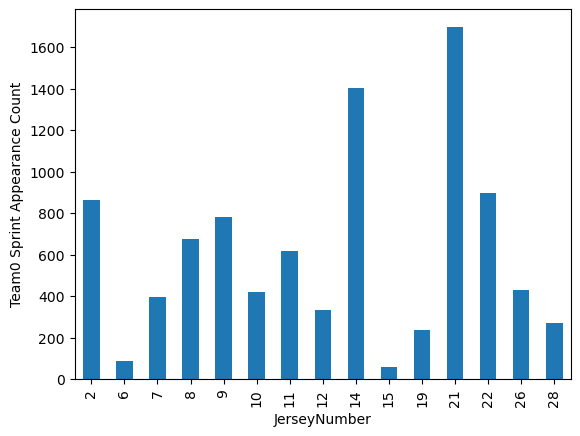

In [332]:
#Aim to plot the total sprint time for each player

#find all data with Sprint_Appearance = 1
df_counts = team_0[team_0['Sprint_Appearance']>0]
#Find sprint_appearance for each player
counts = df_counts.groupby('JerseyNumber')['Sprint_Appearance'].count()
counts.plot(kind='bar')
plt.ylabel('Team0 Sprint Appearance Count')
plt.show()

## Team 1

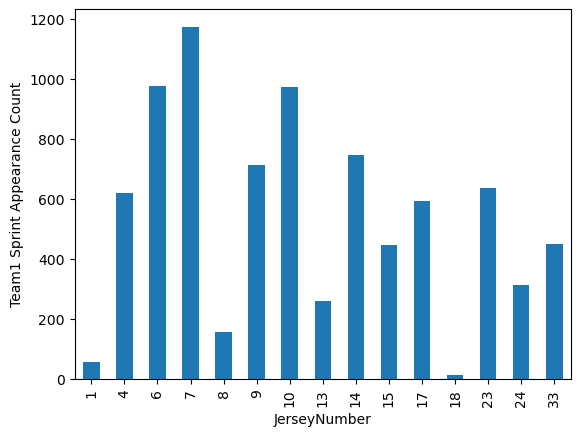

In [333]:
#Aim to plot the total sprint time for each player

#find all data with Sprint_Appearance = 1
df_counts = team_1[team_1['Sprint_Appearance']>0]
#Find sprint_appearance for each player
counts = df_counts.groupby('JerseyNumber')['Sprint_Appearance'].count()
counts.plot(kind='bar')
plt.ylabel('Team1 Sprint Appearance Count')
plt.show()

# High Speed Time Count Analysis

## Team 0

In [323]:
#make a column to count high_speed_appearance for team_0
team_0['High_Speed_Appearance'] = 0
team_0['High_Speed_Appearance'] = team_0.loc[team_0['High_Speed_Distance']!=0,'High_Speed_Appearance']+1
team_0['High_Speed_Appearance'].fillna(0,inplace=True)

/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/610990684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_0['High_Speed_Appearance'] = 0
/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/610990684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_0['High_Speed_Appearance'] = team_0.loc[team_0['High_Speed_Distance']!=0,'High_Speed_Appearance']+1
/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/610990684.py:3: SettingWithCopyWarning: 
A value is 

In [326]:
#Same for team_1
team_1['High_Speed_Appearance'] = 0
team_1['High_Speed_Appearance'] = team_1.loc[team_1['High_Speed_Distance']!=0,'High_Speed_Appearance']+1
team_1['High_Speed_Appearance'].fillna(0,inplace=True)

/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/1285579137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_1['High_Speed_Appearance'] = 0
/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/1285579137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_1['High_Speed_Appearance'] = team_1.loc[team_1['High_Speed_Distance']!=0,'High_Speed_Appearance']+1
/var/folders/y9/tpf4g1_15nqbl3j7qy_tnvzm0000gn/T/ipykernel_86773/1285579137.py:3: SettingWithCopyWarning: 
A value 

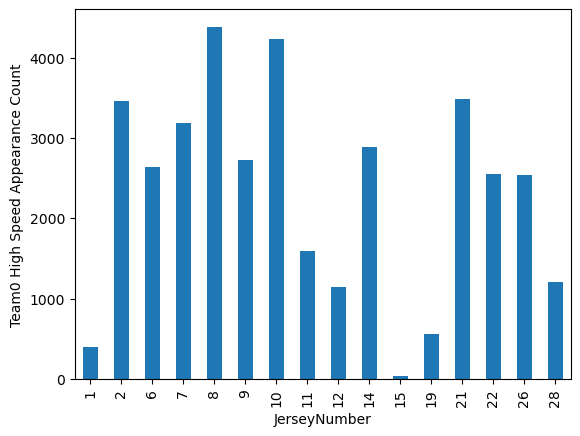

In [334]:
#Aim to plot the total high speed time for each player

#find all data with Sprint_Appearance = 1
df_counts = team_0[team_0['High_Speed_Appearance']>0]
#Find high_speed_appearance for each player
counts = df_counts.groupby('JerseyNumber')['High_Speed_Appearance'].count()
counts.plot(kind='bar')
plt.ylabel('Team0 High Speed Appearance Count')
plt.show()

## Team 1 

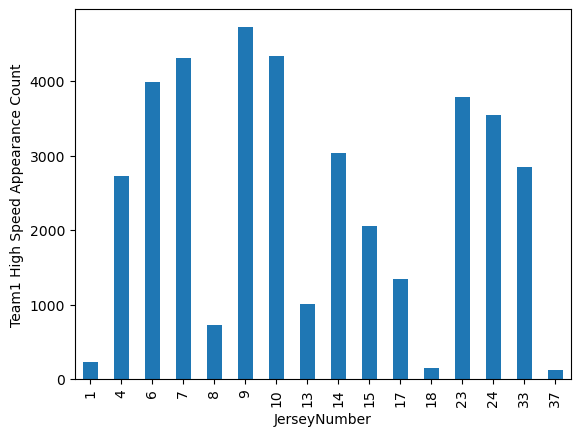

In [335]:
#Aim to plot the total high speed time for each player

#find all data with Sprint_Appearance = 1
df_counts = team_1[team_1['High_Speed_Appearance']>0]
#Find high_speed_appearance for each player
counts = df_counts.groupby('JerseyNumber')['High_Speed_Appearance'].count()
counts.plot(kind='bar')
plt.ylabel('Team1 High Speed Appearance Count')
plt.show()

# Total Time and Distance Analysis

## Team 0

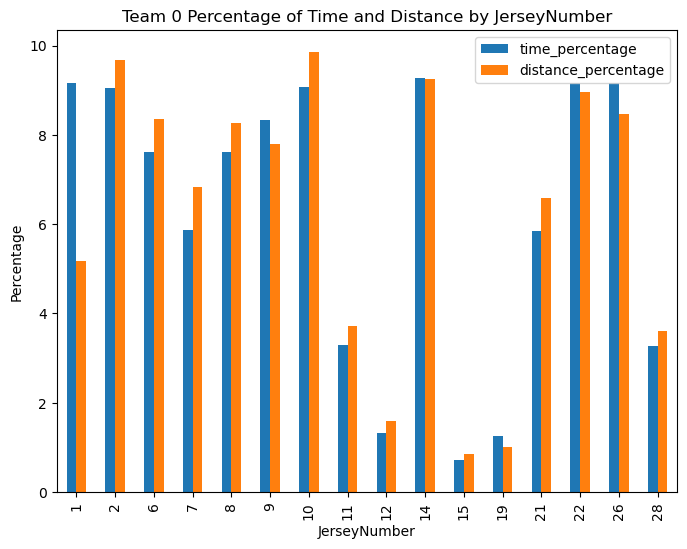

In [356]:
# Group the DataFrame by 'JerseyNumber' and calculate the sum of 'Minutes_Played' and 'Total_Distance'
df_time_distance_0 = team_0.groupby('JerseyNumber')[['Minutes_Played', 'Total_Distance']].sum()
# Define a function to calculate the percentage of time
def calc_time_percentage(row):
    total_time = team_0['Minutes_Played'].sum()
    return (row['Minutes_Played'] / total_time) * 100

# Apply the function to each row and set the result as a new column 'time_percentage'
df_time_distance_0['time_percentage'] = df_time_distance_0.apply(calc_time_percentage, axis=1)

# Define a function to calculate the percentage of distance
def calc_distance_percentage(row):
    total_distance = team_0['Total_Distance'].sum()
    return (row['Total_Distance'] / total_distance) * 100

# Apply the function to each row and set the result as a new column 'time_percentage'
df_time_distance_0['distance_percentage'] = df_time_distance_0.apply(calc_distance_percentage, axis=1)

# Create a horizontal bar chart of the grouped DataFrame
ax = df_time_distance_0[['time_percentage','distance_percentage']].plot(kind='bar', figsize=(8, 6))

# Set the title and axis labels
ax.set_title('Team 0 Percentage of Time and Distance by JerseyNumber')
ax.set_xlabel('JerseyNumber')
ax.set_ylabel('Percentage')
# Show the plot
plt.show()

In [348]:
df_time_distance_0

,Minutes_Played,Total_Distance,time_percentage,distance_percentage
JerseyNumber,,,,
1,100.165000,6240.750000,9.162634,5.163680
2,99.045556,11688.446667,9.060232,9.671178
6,83.178333,10105.965000,7.608772,8.361811
7,64.174444,8267.044667,5.870383,6.840264
8,83.215556,9988.368000,7.612177,8.264510
9,91.059444,9424.042667,8.329700,7.797579
10,99.078333,11913.768000,9.063231,9.857612
11,36.067778,4497.446667,3.299315,3.721248
12,14.531111,1930.603000,1.329239,1.597407


## Team 1

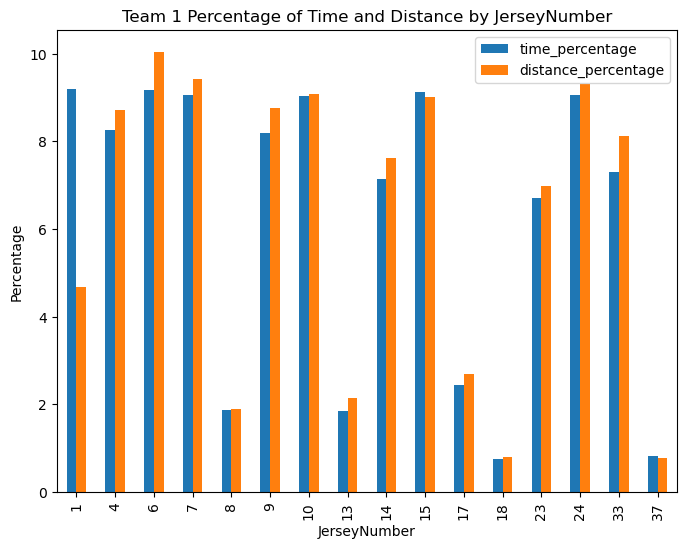

In [355]:
# Group the DataFrame by 'JerseyNumber' and calculate the sum of 'Minutes_Played' and 'Total_Distance'
df_time_distance_1 = team_1.groupby('JerseyNumber')[['Minutes_Played', 'Total_Distance']].sum()
# Define a function to calculate the percentage of time
def calc_time_percentage(row):
    total_time = team_1['Minutes_Played'].sum()
    return (row['Minutes_Played'] / total_time) * 100

# Apply the function to each row and set the result as a new column 'time_percentage'
df_time_distance_1['time_percentage'] = df_time_distance_1.apply(calc_time_percentage, axis=1)

# Define a function to calculate the percentage of distance
def calc_distance_percentage(row):
    total_distance = team_1['Total_Distance'].sum()
    return (row['Total_Distance'] / total_distance) * 100

# Apply the function to each row and set the result as a new column 'time_percentage'
df_time_distance_1['distance_percentage'] = df_time_distance_1.apply(calc_distance_percentage, axis=1)

# Create a horizontal bar chart of the grouped DataFrame
ax = df_time_distance_1[['time_percentage','distance_percentage']].plot(kind='bar', figsize=(8, 6))

# Set the title and axis labels
ax.set_title('Team 1 Percentage of Time and Distance by JerseyNumber')
ax.set_xlabel('JerseyNumber')
ax.set_ylabel('Percentage')

# Show the plot
plt.show()

In [350]:
df_time_distance_1

,Minutes_Played,Total_Distance,time_percentage,distance_percentage
JerseyNumber,,,,
1,100.405000,5688.225667,9.200668,4.675338
4,90.186111,10594.647667,8.264255,8.708086
6,100.051667,12214.495667,9.168290,10.039492
7,98.961111,11450.744333,9.068357,9.411740
8,20.385556,2296.656000,1.868042,1.887696
9,89.423333,10663.393333,8.194357,8.764591
10,98.532778,11040.271667,9.029106,9.074359
13,20.216111,2598.009667,1.852515,2.135389
14,78.052778,9279.789333,7.152410,7.627362
